<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Structure-of-a-Waiting-Line-System" data-toc-modified-id="Structure-of-a-Waiting-Line-System-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Structure of a Waiting Line System</a></span><ul class="toc-item"><li><span><a href="#Single-Server-Waiting-Line" data-toc-modified-id="Single-Server-Waiting-Line-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Single-Server Waiting Line</a></span></li></ul></li><li><span><a href="#Distribution-of-Arrivals" data-toc-modified-id="Distribution-of-Arrivals-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribution of Arrivals</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li></ul></div>

## Structure of a Waiting Line System 

*Information from:
**Quantitative Methods for Business**,
Twelfth Edition
David R. Anderson, Dennis J. Sweeney,
Thomas A. Williams, Jeffrey D. Camm,
James J. Cochran, Michael J. Fry,
Jeffrey W. Ohlmann*


To illustrate the basic features of a waiting line model, we consider the waiting line at the Burger Dome fast-food restaurant. Burger Dome sells hamburgers, cheeseburgers, french fries, soft drinks, and milk shakes, as well as a limited number of specialty items and dessert selections. Although Burger Dome would like to serve each customer immediately, at times more customers arrive than can be handled by the Burger Dome food service staff. Thus, customers wait in line to place and receive their orders.

Burger Dome is concerned that the methods currently used to serve customers are resulting in excessive waiting times and a possible loss of sales. Management wants to conduct a waiting line study to help determine the best approach to reduce waiting times and improve service.

### Single-Server Waiting Line 

In the current Burger Dome operation, an employee takes a customer’s order, determines the total cost of the order, receives payment from the customer, and then fills the order. Once the first customer’s order is filled, the employee takes the order of the next customer waiting for service.

This operation is an example of a single-server waiting line. Each customer entering the Burger Dome restaurant is served by a single order-filling station that handles order placement, bill payment, and food delivery. When more customers arrive than can be served immediately, they form a waiting line and wait for the order-filling station to become
available. 


![im](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/Captura%20de%20pantalla%20de%202020-11-12%2010-29-49.png)

## Distribution of Arrivals
Defining the arrival process for a waiting line involves determining the probability distribution for the number of arrivals in a given period of time. For many waiting line situations,the arrivals occur randomly and independently of other arrivals, and we cannot predict when an arrival will occur. In such cases, analysts have found that the Poisson probability distribution provides a good description of the arrival pattern.


### Exercise
Determine the parameters of the Poisson Distribution for the following data on the entry of Customers in Burger Dome.

### **Data Exploration**

First, we will import the required libraries, and visualize the numbers of arrivals data.

In [ ]:
##### Manipulacion de datos #### Data manipulation
#import math
import numpy as np
import pandas as pd

##### Para series de tiempo #### datetime
import datetime

format = "%a %b %d %H:%M:%S %Y"

#####Estadistica y distribuciones #### Distributions and algorithms
import scipy
from scipy import optimize
import scipy.stats as ss

#####Pymc3 for model implementation ### Estadistica Bayesiana 
import pymc3 as pm
import theano.tensor as tt
import arviz

#####Plotting ### Para que los graficos queden bonitos xd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.core.pylabtools import figsize

matplotlib.rcParams['figure.figsize']=[10,6]
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['ytick.major.size']=20

plt.style.use("seaborn-colorblind")


N_SAMPLES = 10000

# **Data visualization**


we will visualize the data from time series


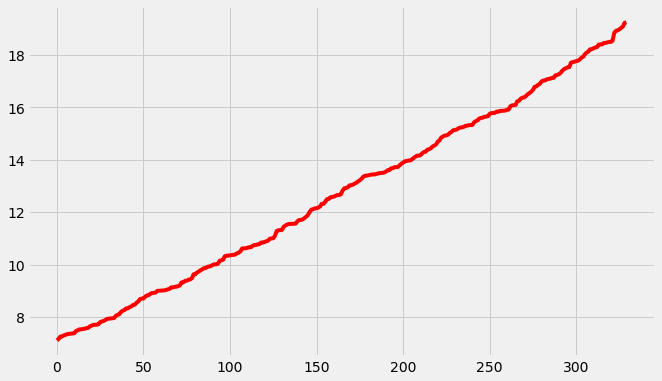

In [ ]:
#####Lectura de datos ##### Data reading
data = pd.read_csv('https://raw.githubusercontent.com/Izainea/visualizacion/master/Clients.csv',index_col='Unnamed: 0')
Hora = []#Creamos una lista vacia para arreglar los datos en una serie de tiempo ### empty list to fix the data in a time series
i_= []
for i in range(330):
  Hora.append(datetime.datetime.strptime(data.Hora[i], '%H:%M:%S'))#Agregamos los datos a la serie de tiempo ### We add the data to the time series

TiempoExacto= [] 
for i in range(330):
  TiempoExacto.append(Hora[i].second/3600 + Hora[i].minute/60+Hora[i].hour) #We add the data to the exactly time series


Data=pd.DataFrame(TiempoExacto, columns=['Tiempo Exacto'])
Data['Numero de Personas']= np.arange(330)


with plt.style.context('fivethirtyeight'):
  plt.plot(TiempoExacto, 'r')


# **Visualization of normalized data**

Since the first graph does not give us much information about the distribution of the data, what we will do is separate the arrival data into time intervals and verify if we obtain a better graph to fit it through the Poisson distribution

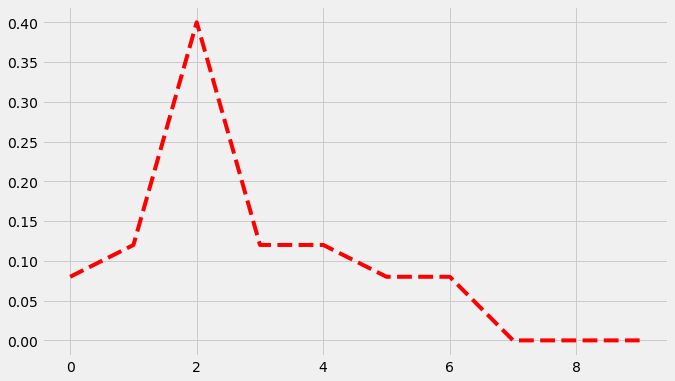

In [ ]:
n=7 #Es la hora de inicio ### It's the start time
Ind=[] #Empy list 
for i in range(25):
  A=Data[Data['Tiempo Exacto'].between(n,n+0.0833333333)]#Lo estamos considerando para cada5 minutos ###We are considering it for every 5 minutes
  Ind.append(A['Numero de Personas'].count())
  n+=0.0833333333
  #n+= (0.5/30) * I #Donde I:= intervalo de tiempo en minutos
  #n+= (0.5/30) * 1 = 0.0166666667 #Cada minuto
  #n+= (0.5/30) * 5 = 0.0833333333 #Cada 5 minutos
  #n+= (0.5/30) * 10 =0.166666667 #Cada 10 minutos

#########Normalized Data

Ind_nor=[]
tim_est=range(0,10)
for i in range(len(tim_est)):
  k=Ind.count(i)
  Ind_nor.append(k/len(Ind))  


with plt.style.context('fivethirtyeight'):
  plt.plot(Ind_nor, "--", color= "r")

# **Poisson distribution to approximate the data**
 

We are going to assume that the number of arrivals in time interval can be modeled by a Poisson distribution which is a discrete distribution.

The Poisson Distribution is given by the formula: 

$$p(\lambda,k)=\frac{ \lambda^{k}e^{-\lambda} }{k!}$$

Where $k$ is an integer $(k≥0)$ and $\lambda$ is a positive real number. The Poisson Distribution describes the probability of finding exactly $k$ events in a period of time if the events occur independently at a constant rate $\lambda$.

In Python we can easily generate it with the help of scipy.stats,






<function matplotlib.pyplot.show>

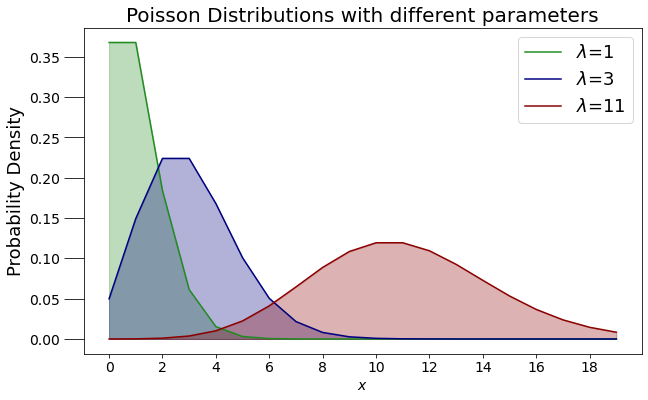

In [ ]:
x=range(0,20)
lambd=(1,3,11) 
colors=("forestgreen", "navy", "darkred")

params=zip(lambd, colors)
for param in params:
  y=[]
  for i in x:
    P=ss.poisson(param[0])
    y.append(P.pmf(i))
  plt.plot(x,y, label=r"$\lambda$=%i" %param[0], color = param[1])
  plt.fill_between(x,y,color=param[1], alpha=0.3)

plt.legend(prop={'size':18});
plt.xticks([0,2,4,6,8,10,12,14,16,18])
plt.xlabel("$x$")
plt.ylabel("Probability Density", size=18)
plt.title("Poisson Distributions with different parameters", size=20);

plt.show

We will use MCMC to find the most likely value of the parameter under the data.


# **Prior Distribution for $\lambda$**

We have no evidence to suggest what the prior distributions for the model parameter $\lambda$ are ahead of time. Therefore, we can model them as if they came from a normal distribution. The normal, or Gaussian, distribution is defined by the mean, $\mu$, and the precision, $\tau$. The precision is the reciprocal of the standard deviation, $\sigma$. The mean defines the location of the distribution and the precision shows the spread. A larger value of $\tau$ indicates the data is less spread out (it is more precise) and hence the variation is smaller. The mean can be either positive or negative, but the precision will always be positive. A normal distribution as defined here is represented as:


$$ f(x | \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left( -\frac{\tau}{2} (x - \mu)^2 \right) $$

Probability density functions for three normal distributions are shown below.

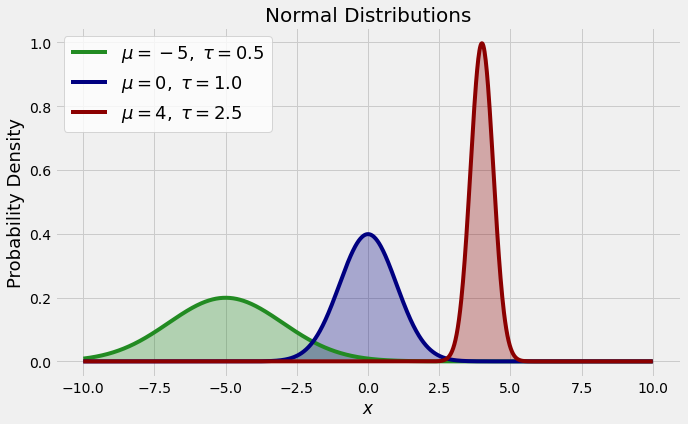

In [ ]:

# Set up the plotting parameters
nor = ss.norm 
x= np.linspace(-10, 10, 1000)
mu = (-5, 0, 4)
tau = (0.5, 1, 2.5)
colors = ("forestgreen", "navy", "darkred")



# Plot 3 pdfs for different normal distributions
params = zip(mu, tau, colors)
for param in params:
    y = nor.pdf(x, loc = param[0], scale = 1 / param[1])
    with plt.style.context('fivethirtyeight'):
      plt.plot(x, y, 
             label="$\mu = %d,\;\\tau = %.1f$" % (param[0], param[1]), 
             color = param[2])
      plt.fill_between(x, y, color = param[2], alpha = 0.3)
    
    
plt.legend(prop={'size':18});
plt.xlabel("$x$")
plt.ylabel("Probability Density", size = 18)
plt.title("Normal Distributions", size = 20);

# **Markov Chain Monte Carlo**

Markov Chain Monte Carlo will sample $\lambda$ from  normal distribution to find the parameter. Each iteration (state), an estimate for $\lambda$ are drawn from the prior. If the parameter increase the probabilty of the data, the state is accepted, but if the parameter are not in agreement with the data, the state is rejected. 

Markov Chain Markov Chain Monte Carlo will sample $\lambda$ from  normal distribution to find the parameter. Each iteration (state), an estimate for $\lambda$ are drawn from the prior. If the parameter increase the probabilty of the data, the state is accepted, but if the parameter are not in agreement with the data, the state is rejected. Monte Carlo refers to the sampling part of the algorithm. Markov Chain means that the next state is only dependent on the current state MCMC will return every sample of the parameter for the number of specified steps. This is known as the model trace. To find the most likely parameter, we can take the average of the samples in the trace. MCMC does not given an exact answer, but rather tries to find the maximum likelihood states under the data.

When modeling with MCMC up to 50% of the initial steps, referred to as the burn-in part of the trace, are discarded because the algorithm returns more likely parameters as the number of samples increases. The initial samples are less likely than the latter samples on average. There are a number of methods to test for convergence of MCMC, including visually inspecting the trace, and calculating the auto-correlation of the trace (a lower auto-correlation is an indicator of convergence). We will look at the trace in this example. 

# **Posterior Probability of number of arrivals**

We have all the pieces for the poesterior probabilty and can now put them together. The Poisson distribution describes the number of arrivals in time interval , but we do not konw the parameter $\lambda$. The aim is to find the parameter of the Poisson distribution which maximize the likelihood of the observed data. The parameter are assumed to come from a normal distribution defined by a mean, $\mu$ and a variance, $\tau$. The MCMC algorithm will sample values of $\mu$ and $\tau$ for $\lambda$ to try and maximize the parameter of the Poisson distribution given the data.


# **PyMC3 Model** 

We are using a powerful Bayesian Inference library in Python called PyMC3. This library has features for running Markov Chain Monte Carlo and other inference algorithms.

The following code creates the model and performs MCMC, drawing N_SAMPLES number of samples for $\lambda$  The specific sampling algorithm is Metropolic Hastings.

In [ ]:

Indicadores = np.array(Ind)
time = np.arange(25)

with pm.Model() as fila_model:
    # Create the lambda parameter
    lambd = pm.Normal('$\lambda$', mu=0.000001, sigma=3)  
    
    # Create the probability from the Poisson distribution
    p = pm.Poisson('p', lambd, observed=Indicadores)
    
    # Starting values are found through Maximum A Posterior estimation
    # start = pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    fila_trace = pm.sample(N_SAMPLES, step=step, cores=2);

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [$\lambda$]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


The trace variable contains all of the samples drawn from the posterior for $\lambda$  We can graph these samples to explore how they change over the course of sampling. The idea of MCMC is that the samples get more likely given the data as the algorithm continues. In other words, the MCMC algorithm converges on the most likely values as the samples increase. We expect the latter values drawn from the posterior to be more accurate than the earlier values. In Markov Chain Monte Carlo, it is common practice to discard a portion of the samples, usually about 50%, which are known as the burn-in samples. For this report I will discard exactly the first 50% of the samples.


# **Visualize Posteriors for $\lambda$**

The values returned in the trace are all the samples drawn for the parameter. We can visually inspect these values in histogram.

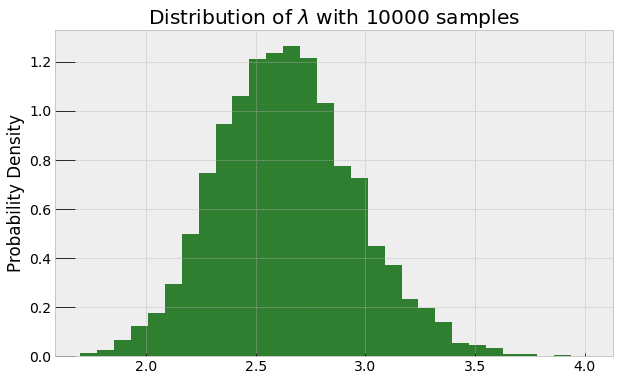

In [ ]:
lambd_samples = fila_trace["$\lambda$"][5000:, None]

with plt.style.context('bmh'):
  plt.title(r"""Distribution of $\lambda$ with %d samples""" % N_SAMPLES)
  plt.hist(lambd_samples, histtype='stepfilled', 
         color='darkgreen',bins=30, alpha=0.8, density=True)
  plt.ylabel('Probability Density');


# **Posterior for number of arrivals**

In [ ]:
#time values for probability prediction 

time_est=range(0,10)

lambd_samples=lambd_samples[int(len(lambd_samples)/2):]
#take most likely parameters to be mean values 

lambd_est= lambd_samples.mean()

#probability at each time using mean values 

fila_est_=ss.poisson(lambd_est)
fila_est_=fila_est_.pmf(time_est)

Ind_norm=[]

for i in range(len(time_est)):
  k=Ind.count(i)
  Ind_norm.append(k/len(Ind))  

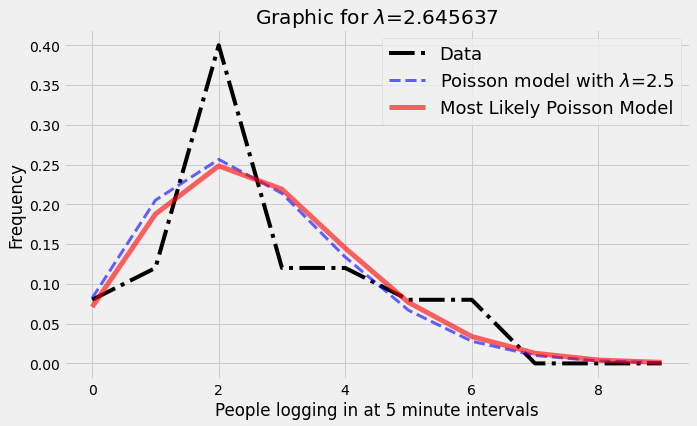

In [ ]:
#Plotting 

entradas_est1 = ss.poisson(2.5).pmf(time_est) 

with plt.style.context('fivethirtyeight'):
  plt.plot(Ind_norm, "-.", color='k', label='Data')
  plt.plot(time_est, entradas_est1, 'b--',
          lw=3,  alpha=0.6, label="Poisson model with $\lambda$=2.5")  
  plt.plot(time_est, fila_est_, 'r-',
          lw=5,  alpha=0.6, label="Most Likely Poisson Model")   
  plt.title('Graphic for $\lambda$=%f' %lambd_est);
  plt.legend(prop={'size':18})
  plt.ylabel('Frequency')
  plt.xlabel("People logging in at 5 minute intervals");
  plt.show()



##Confidence Interval

There are many other diagnostics of the model that we can perform. For example, we know there is a considerable amount of uncertainty in our estimates for $\lambda$. To reflect this in the graph, we can include include the 95% confidence interval at each time based on all of the samples.

In [ ]:
###Confidence Interval 
fila_all_est = ss.poisson(lambd_samples).pmf(time_est)
quantiles = ss.mstats.mquantiles(fila_all_est, [0.025, 0.975], axis=0)

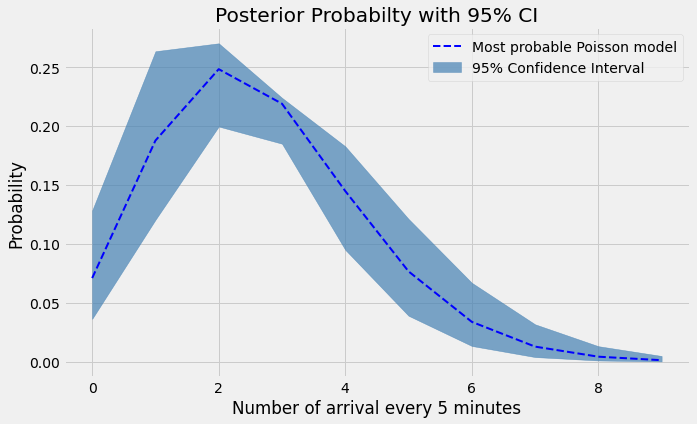

In [ ]:
with plt.style.context('fivethirtyeight'):
  plt.fill_between(time_est, *quantiles, alpha=0.7, color='steelblue', label='95% Confidence Interval')
  plt.plot(time_est, fila_est_, 'b--', lw=2, label="Most probable Poisson model")
  #plt.scatter(time_est, Ind_norm, label="obs", color= "r")
  plt.legend(prop={'size':14})
  plt.xlabel('Number of arrival every 5 minutes'); plt.ylabel('Probability'); 
  plt.title('Posterior Probabilty with 95% CI');


### **Posterior Probability Distribution for Specific Number of people** 

We can also plot the posterior distribution of 
arrival time as a histogram based on all of the samples for the paramter.





In [ ]:
def line_posterior(number_people):
  prob=ss.poisson(lambd_samples).pmf(number_people)
  with plt.style.context('dark_background'):
    plt.hist(prob, bins=120, histtype='step', lw=4, color = 'c')
    plt.title("Probability distribution for the arrival of %d people" %number_people)
    plt.xlabel('Probability of arrivals'); plt.ylabel('Samples'); 
    plt.show()
  

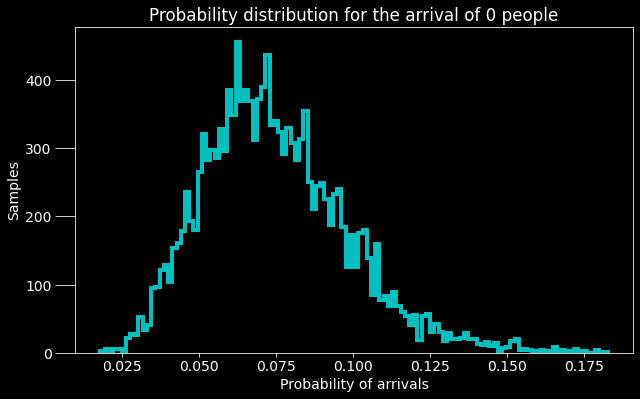

In [ ]:
line_posterior(0)

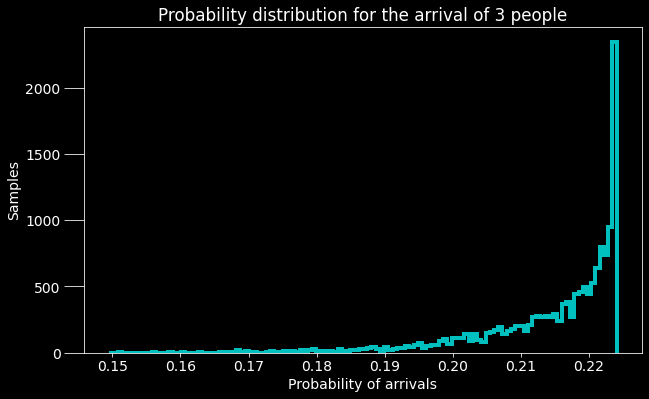

In [ ]:
line_posterior(3)

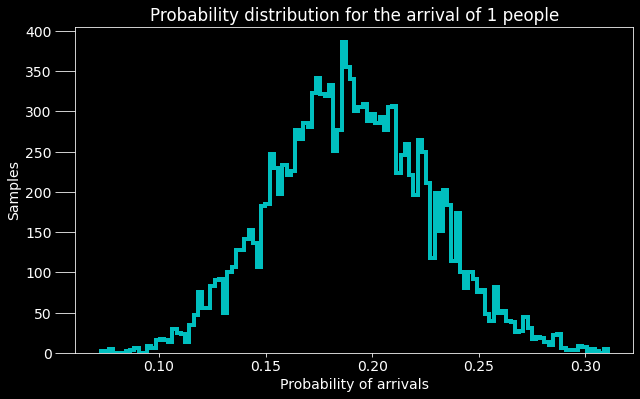

In [ ]:
line_posterior(1)

In [ ]:
print('Most likely λ parameter in five minutes interval: {:.6f}.'.format(lambd_est))

Most likely λ parameter in five minutes interval: 2.645637.


# **Convergence in Markov Chain Monte Carlo**

How can we know if the model converged? We can look at the trace, or the path of the values over sampling. Another option is to look at the auto-correlation of the samples. In Markov Chain modeling, the samples are correlated with themselves because the next value depends on the current state (or the current state and past states based on the order)


# **Trace Plots**

The plot below show the λ traces discarding exactly the first 50% of the samples from algorithm



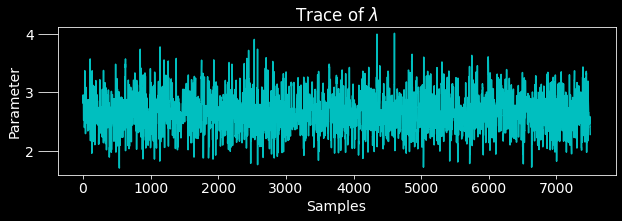

In [ ]:
# Plot alpha trace
with plt.style.context('dark_background'):
  plt.subplot(211)
  plt.title(r'Trace of $\lambda$')
  plt.plot(lambd_samples[int(len(lambd_samples)/2):], color = 'c')
  plt.xlabel('Samples'); plt.ylabel('Parameter');
#plt.tight_layout(h_pad=0.8)



# **Built in Diagnostics**

PyMC3 has many built-in diagnostics for model evaluation. Here are the trace plot and autocorrelation plots.

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


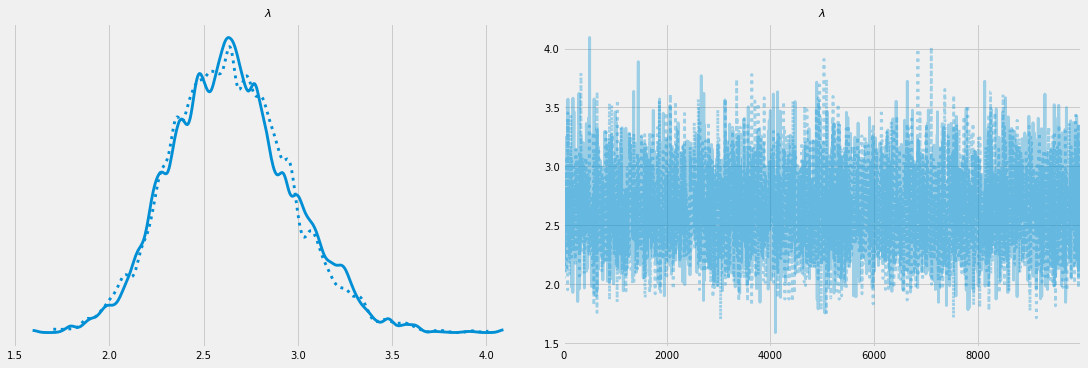

In [ ]:
with plt.style.context('fivethirtyeight'):
  pm.plots.traceplot(fila_trace,['$\lambda$'],figsize=[15,5]
                   );

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


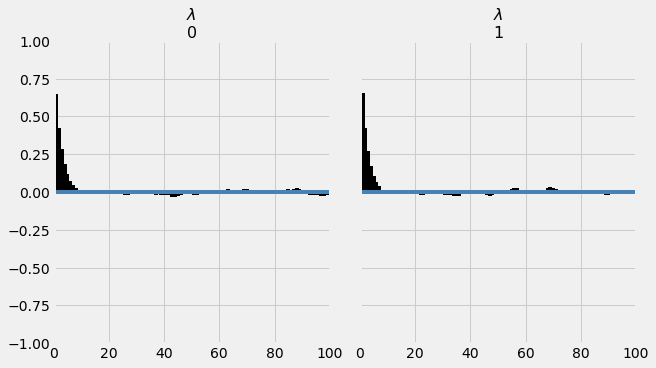

In [ ]:
with plt.style.context('fivethirtyeight'):
  pm.autocorrplot(fila_trace, ['$\lambda$'], figsize=[9,5]);

# **Goodness-of-fit test for discrete distributions**

Many experiments include observing a random sample $ X_1, X_2,. . . ,
X_n $ of some discrete distribution. Then you may wish to investigate whether the basic distribution is a member of a particular family, for example the Poisson family. In the case of a Poisson distribution, the set of possible
values ​​is infinite, so values ​​must be grouped into $ k $ subsets before
a chi-square test can be used. 
Based on the following theorem and the conditions it provides us to reject or not reject the null hypothesis $ H_0 $ 

**Theorem**:

let be $ \hat{\theta_1}, \cdots, \hat{\theta_m}$ the maximum likelihood estimators of
$ \theta_1, \cdots, \theta_m $ based on
the complete sample $ X_1,. . . , X_n $, and denote with $ \chi^2 $ the statistic based on these estimators. So the critical value $ c_\alpha $ that specifies a tail $\alpha $ level test superior satisfies:

$$\chi^{2}_{\alpha, k-1-m} \leq c_\alpha \leq \chi^{2}_{\alpha, k-1}$$

The proof procedure implied by this theorem is as follows:



1.  if $\chi^2 \geq \chi^{2}_{\alpha, k-1}$ rejected $H_0$
2.  if $\chi^2 \leq \chi^{2}_{\alpha, k-1-m}$ no rejected $H_0$
3. if $ \chi^{2}_{\alpha, k-1-m}<\chi^2 < \chi^{2}_{\alpha, k-1}$ without decision





In [ ]:
####Setting up the table####

na=[]
for i in range(3):
  na.append(str(i))
na.append("4 or more")

####Frecuency####

Ind2=[]
for i in range(3):
  Ind2.append(Ind.count(i))
Ind2.append(Ind.count(3)+Ind.count(4))


pd.DataFrame({"Number of people":na, "Frequency":Ind2})

,Number of people,Frequency
0,0,2
1,1,3
2,2,10
3,4 or more,6


In [ ]:
number_est=[]#number of estimates

for i in range(3):
  number_est.append(len(Ind)*ss.poisson(lambd_est).pmf(i))
number_est.append(len(Ind)-sum(number_est))

pd.DataFrame({"Number of people":na, "Frecuency": Ind2, "Number of estimates": number_est})#number of estimates

,Number of people,Frecuency,Number of estimates
0,0,2,1.774003
1,1,3,4.693368
2,2,10,6.208475
3,4 or more,6,12.324153


Now we can calculate the value of $\chi ^2$ value and the $ p-value $, where the p-value means the smallest admitted error

In [ ]:
D,p_value = ss.chisquare(Ind2,number_est) #chi square from scypi
print("The value of statistichs is %.4f the p-value of the test is %.4f" %(D, p_value))

The value of statistichs is 6.2005 the p-value of the test is 0.1023


The smallest error admitted to reject $H_0$ is $10.23\%$ and we can say that the poisson distribution 
is appropriate for modeling the distribution of data.since it is very usual to work with errors smaller than 5%





# **Conclusions**

Given the data and the adjustment test, we can affirm that the number of people who arrive at an establishment and are assigned a waiting time can be very accurately approximated by a Poisson distribution, and it also follows that every 5 minutes $ \lambda  = 2.645637$ estimated, people arrive at the establishment.


# Bibliography




[1] Probabilidad y estadística, Liliana Blanco, Universidad Nacional de Colombia, 2004.

[2] Markov_chain_monte_carlo, WillKoehrsen, Github, 2018.

[3] Métodos de cadenas de Markov Monte Carlo, Conchi Ausín, Universidad Carlos III de Madrid, 2012.

[4] Estadística Bayesiana - Teoría y Conceptos Básicos, Eduardo Gutiérrez Peña, Universidad Nacional Autonoma de México.

[5] MCMC Methods for data modeling, Kenneth Scerri.

[6] The Metropolis Hastings Algorithm, Matthew Stephens, 2018.